# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# import matplotlib.pyplot as plt
import csv
import math
import plotly.graph_objects as go
import numpy as np
from jupyter_client.connect import channel_socket_types
from prompt_toolkit.key_binding.bindings.named_commands import uppercase_word
import pandas as pd
from scipy.fft import fft, ifft
# plt.rcParams['figure.figsize'] = [25, 15]

In [2]:
PLOT_WIDTH = 2000
PLOT_HEIGHT = 1000

In [3]:
with open('./lut_channnel_sweep.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(spamreader)
    channels = [int(row[0]) for row in rows]
    channel_meas = [float(row[1]) for row in rows]
with open('./lut_filter_sweep.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(spamreader)
    filters = [int(row[0]) for row in rows]
    filter_meas = [float(row[1]) for row in rows]
with open('./lut_input_sweep.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(spamreader)
    inputs = [int(row[0]) for row in rows]
    input_meas = [float(row[1]) for row in rows]
with open('./lut_channel_filter_sweep.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(spamreader)
    channel_cf = [int(row[0]) for row in rows[1:]]
    filters_cf = [int(row[1]) for row in rows[1:]]
    channel_filter_meas = [float(row[2]) for row in rows[1:]]


In [4]:
def calc_upper(c: int, m: float, b: float) -> float:
    return np.floor(c / 32) * 32 * m + b
def calc_lower(c: int, m: float, b: float) -> float:
    return np.ceil(c / 32) * 32 * m + b
def calc_mean(c:int , m_u: float, b_u: float, m_l: float, b_l: float) -> float:
    return (calc_upper(c, m_u, b_u) + calc_lower(c, m_l, b_l)) / 2
def calc_rect(c:int , m_u: float, b_u: float, m_l: float, b_l: float) -> float:
    if ((c - 1) % 8) < 4:
        return calc_upper(c, m_u, b_u)
    else:
        return calc_lower(c, m_l, b_l)


In [5]:
def lin_interpol(x0:float, x1:float, y0:float, y1:float) -> (float, float):
    m = (y1 - y0) / (x1 - x0)
    b = y1 - m * x1
    return m, b

0.034859607127407585
0.03090997176087061
[70.16200016 -0.j         31.15959717-12.01689929j
 25.58601364-12.17736895j ... 22.40247812+12.29113178j
 25.58601364+12.17736895j 31.15959717+12.01689929j]


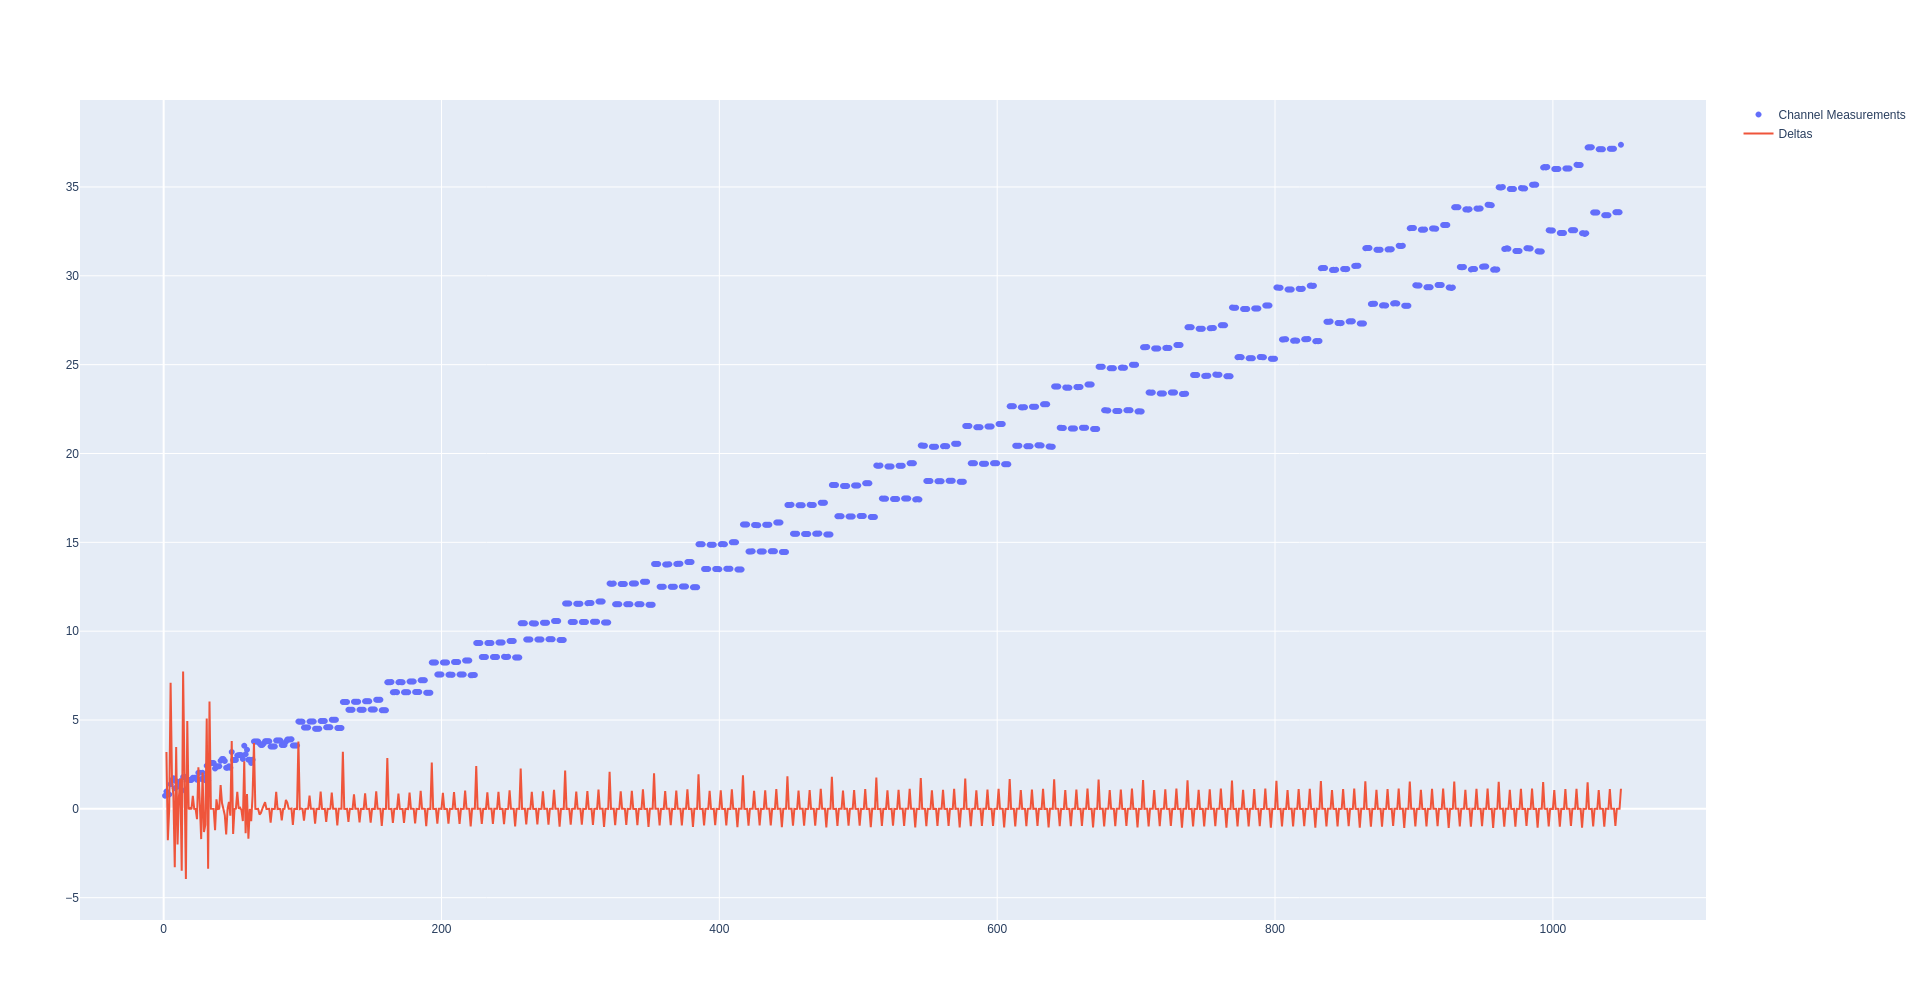

In [7]:
upper_sampled_channels = [7, 993]
lower_sampled_channels = [1, 992]
# upper_sampled_channels = [7, 515]
# lower_sampled_channels = [1, 529]
# # print(len(upper_sampled_channels))

upper_sampled_channel_meas = [channel_meas[channels.index(c)] for c in upper_sampled_channels]
lower_sampled_channel_meas = [channel_meas[channels.index(c)] for c in lower_sampled_channels]

upper_m, upper_b = lin_interpol(upper_sampled_channels[0], upper_sampled_channels[1], 
                                upper_sampled_channel_meas[0], upper_sampled_channel_meas[1])
lower_m, lower_b = lin_interpol(lower_sampled_channels[0], lower_sampled_channels[1], 
                                lower_sampled_channel_meas[0], lower_sampled_channel_meas[1])

r_c = list(range(0, 1050))

r_v_upper = [calc_upper(c, upper_m, upper_b) for c in r_c]
r_v_lower = [calc_lower(c, lower_m, lower_b) for c in r_c]
print(upper_m)
print(lower_m)

fig = go.Figure()

lv = channel_meas[0]
deltas = []
for meas in channel_meas[1:]:
    deltas.append((meas / lv) * 10 - 10 )
    lv = meas
fig.add_trace(go.Scatter(x=channels, y=channel_meas, name="Channel Measurements", mode="markers"))
# fig.add_trace(go.Scatter(x=channels, y=r_v_lower, name="Channel Measurements", mode="markers"))
# fig.add_trace(go.Scatter(x=r_c, y=r_v_upper, name="Upper_steps", mode="markers"))
# fig.add_trace(go.Scatter(x=r_c, y=r_v_lower, name="Lower_steps", mode="markers"))
# fig.add_trace(go.Scatter(x=r_c, y=[c * upper_m + upper_b for c in r_c], name="Upper Sampled Channels"))
# fig.add_trace(go.Scatter(x=r_c, y=[c * lower_m + lower_b for c in r_c], name="Lower Sampled Channels"))
fig.add_trace(go.Scatter(x=channels[1:], y=deltas, name="Deltas"))
# y = fft(deltas)

# xf = fftfreq(N, T)[:N//2]

# import matplotlib.pyplot as plt

# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

# plt.grid()

# plt.show()
print(y)
fig.update_layout(
    autosize=False,
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
    # margin=dict(
    #     l=50,
    #     r=50,
    #     b=100,
    #     t=100,
    #     pad=4
    # ),
)

0.016604167625824784


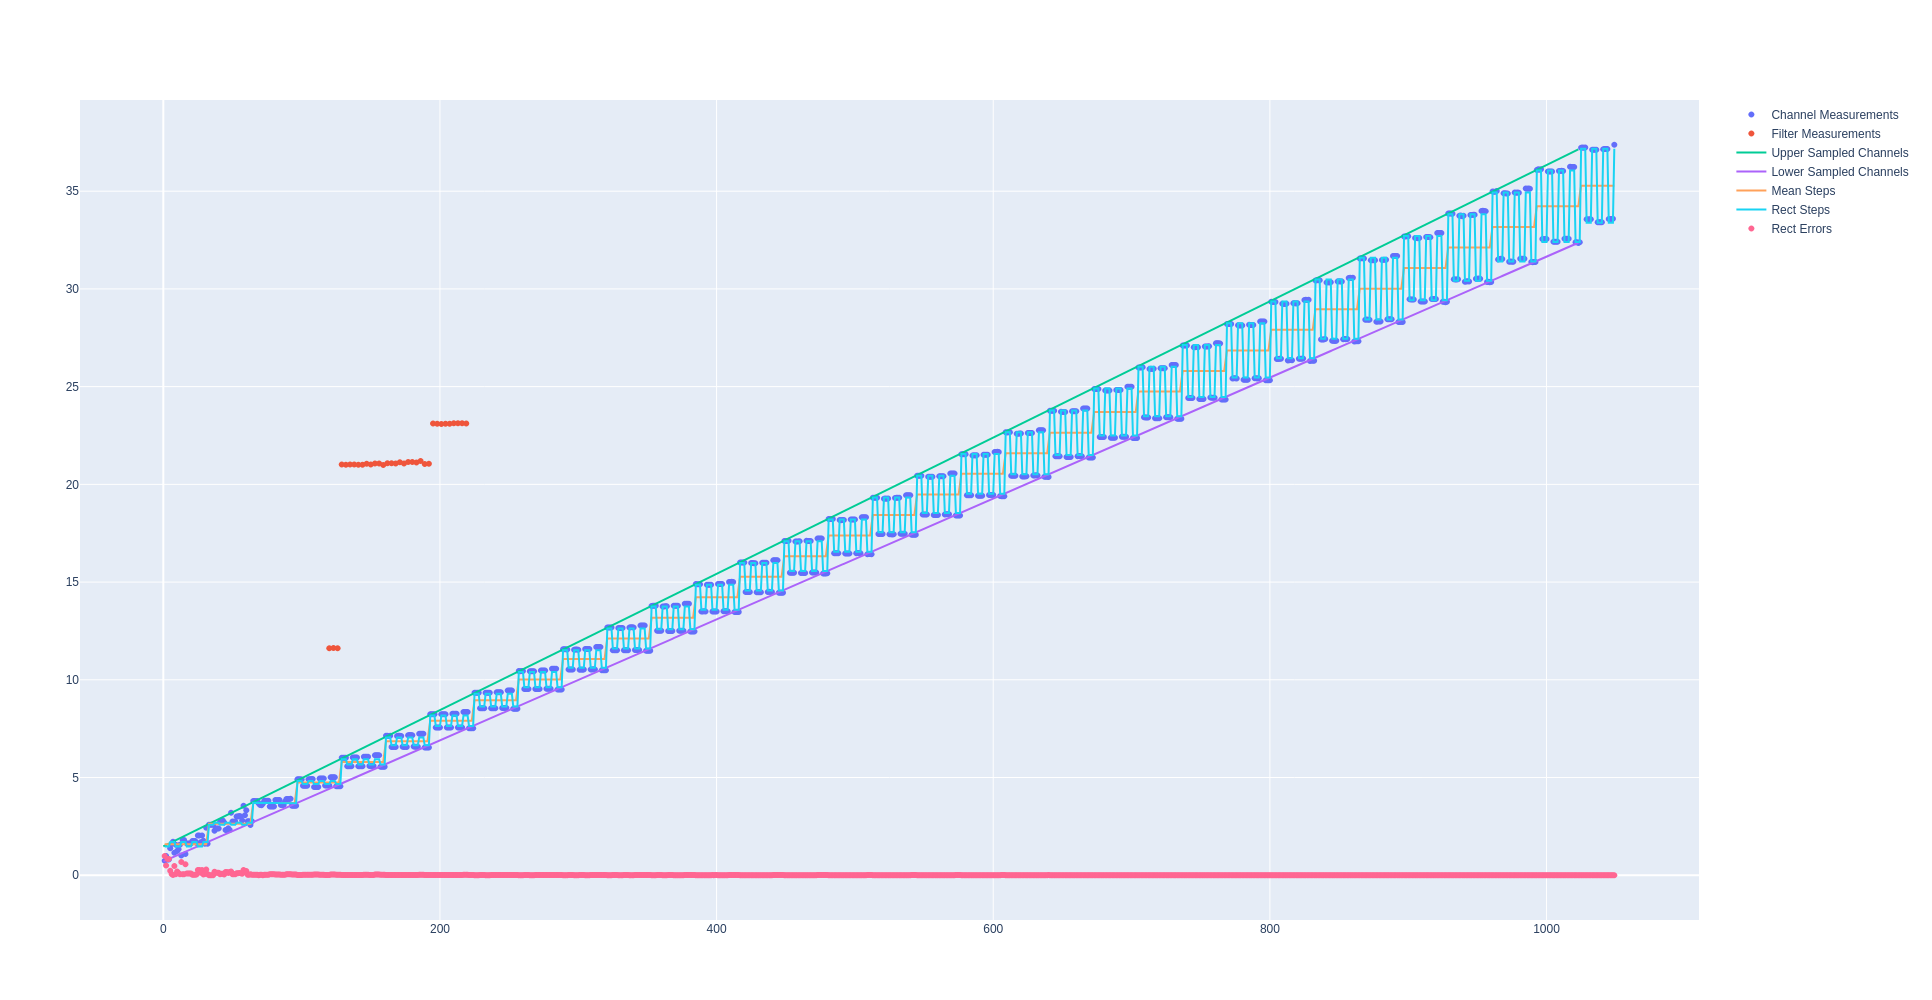

In [8]:
first_order_approx = []
second_order_approx = []
pol_approx = []



# upper_sampled_channels = [1, 3, 5, 9, 15, 33, 65, 129, 257, 513, 993]
upper_sampled_channels = [7, 993]
lower_sampled_channels = [1, 991]
# upper_sampled_channels = [7, 515]
# lower_sampled_channels = [1, 529]
# # print(len(upper_sampled_channels))

upper_sampled_channel_meas = [channel_meas[channels.index(c)] for c in upper_sampled_channels]
lower_sampled_channel_meas = [channel_meas[channels.index(c)] for c in lower_sampled_channels]

upper_m, upper_b = lin_interpol( upper_sampled_channels[0], upper_sampled_channels[1], upper_sampled_channel_meas[0], upper_sampled_channel_meas[1])
lower_m, lower_b = lin_interpol(lower_sampled_channels[0], lower_sampled_channels[1], lower_sampled_channel_meas[0], lower_sampled_channel_meas[1])


# r_c = [c / 10 for c in range(1, 10240)]
r_c = channels

r_v_upper = [calc_upper(c, upper_m, upper_b) for c in r_c]
r_v_lower = [calc_lower(c, lower_m, lower_b) for c in r_c]
r_v_mean = [calc_mean(c,upper_m, upper_b, lower_m, lower_b) for c in r_c]
r_v_rect = [calc_rect(c, upper_m, upper_b, lower_m, lower_b) for c in r_c]

err_upper = [np.abs((approx - meas) / meas) for approx, meas in zip(r_v_upper, channel_meas)]
err_lower = [np.abs((approx - meas) / meas) for approx, meas in zip(r_v_lower, channel_meas)]
err_mean = [np.abs((approx - meas) / meas) for approx, meas in zip(r_v_mean, channel_meas)]
err_rect = [np.abs((approx - meas) / meas) for approx, meas in zip(r_v_rect, channel_meas)]

# print(np.mean(err_sine))
print(np.mean(err_rect))

fig = go.Figure()
fig.add_trace(go.Scatter(x=channels, y=channel_meas, name="Channel Measurements", mode="markers"))
fig.add_trace(go.Scatter(x=filters, y=filter_meas, name="Filter Measurements", mode="markers"))

fig.add_trace(go.Scatter(x=list(range(1024)), y=[c * upper_m + upper_b for c in range(1024)], name="Upper Sampled Channels"))
fig.add_trace(go.Scatter(x=list(range(1024)), y=[c * lower_m + lower_b for c in range(1024)], name="Lower Sampled Channels"))
# fig.add_trace(go.Scatter(x=r_c, y=r_v_upper, name="Upper_steps", mode="markers"))
# fig.add_trace(go.Scatter(x=r_c, y=r_v_lower, name="Lower_steps", mode="markers"))
fig.add_trace(go.Scatter(x=r_c, y=r_v_mean, name="Mean Steps"))
fig.add_trace(go.Scatter(x=r_c, y=r_v_rect, name="Rect Steps"))

# fig.add_trace(go.Scatter(x=r_c, y=err_upper, name="Upper Errors"))
# fig.add_trace(go.Scatter(x=r_c, y=err_lower, name="Lower Errors"))
# fig.add_trace(go.Scatter(x=r_c, y=err_mean, name="Mean Errors"))
fig.add_trace(go.Scatter(x=r_c, y=err_rect, name="Rect Errors", mode="markers"))

fig.update_layout(
    autosize=False,
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
    # margin=dict(
    #     l=50,
    #     r=50,
    #     b=100,
    #     t=100,
    #     pad=4
    # ),
)


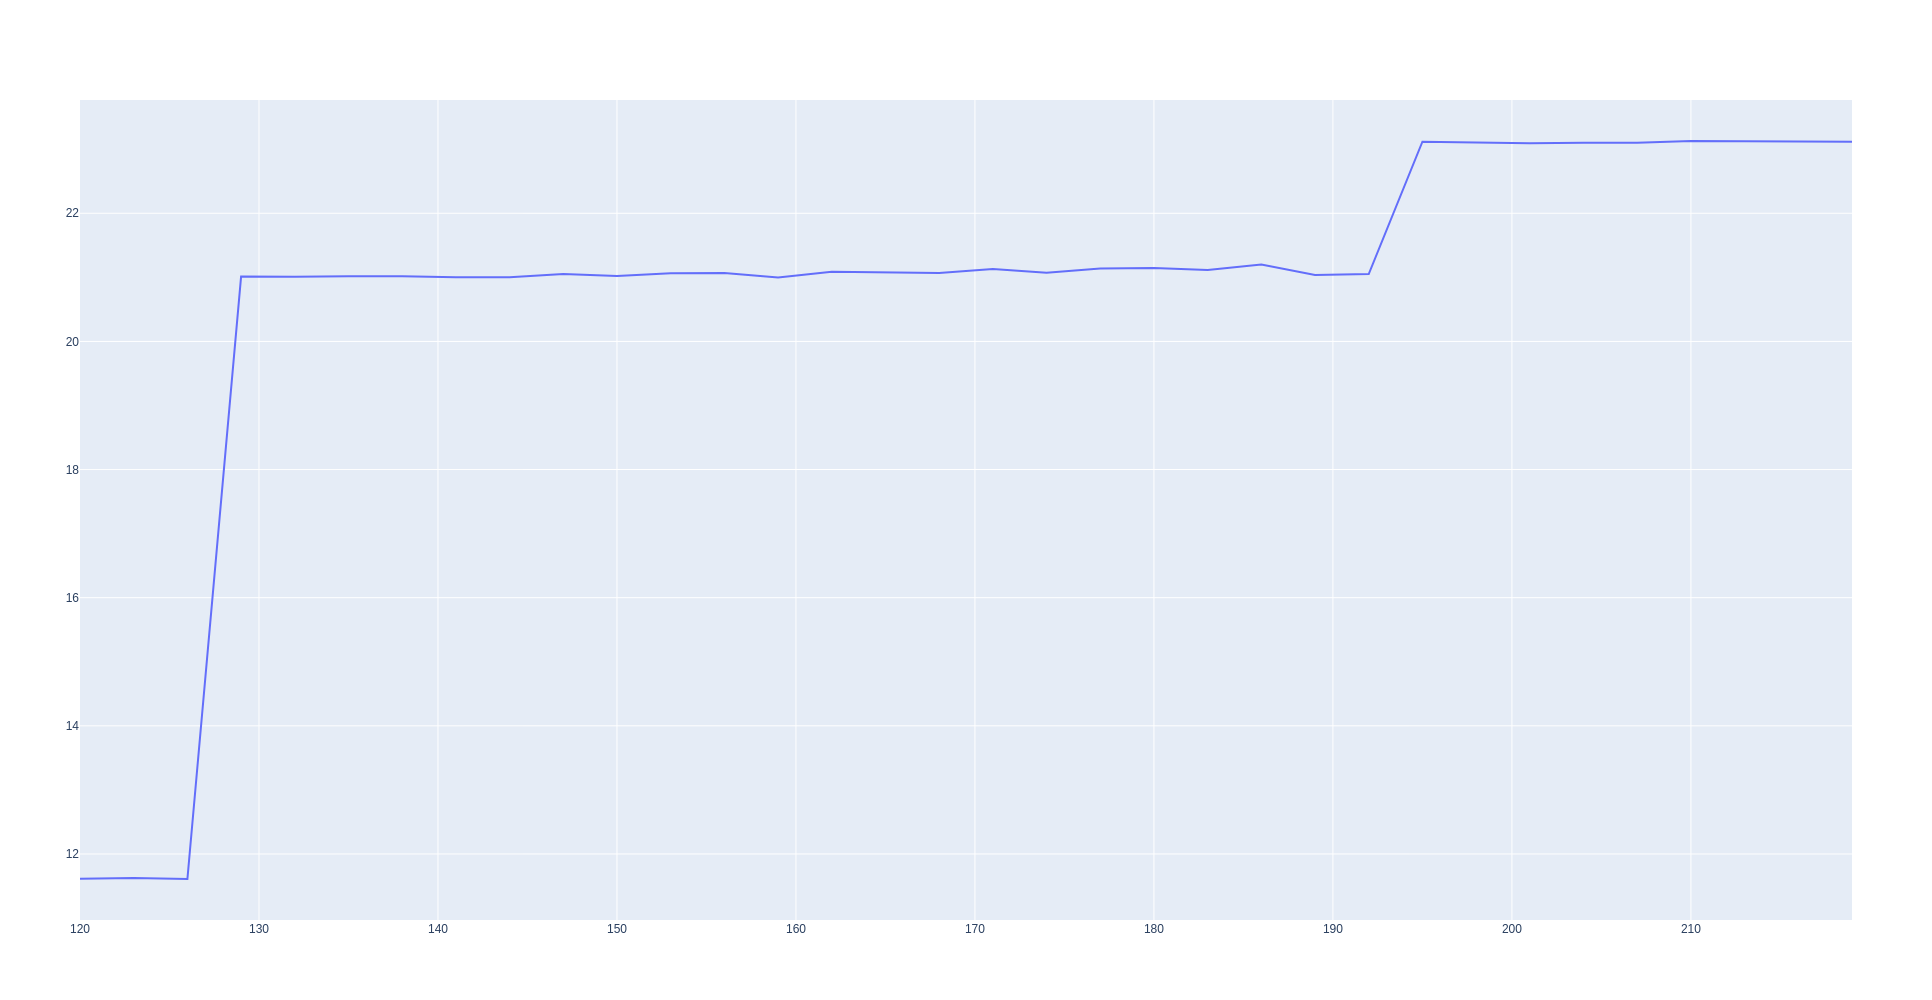

In [9]:
with open('./lut_filter_sweep.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(spamreader)
    filters = [int(row[0]) for row in rows]
    filter_meas = [float(row[1]) for row in rows]
fig = go.Figure()
fig.add_trace(go.Scatter(x=filters, y=filter_meas, name="Filter Measurements"))

fig.update_layout(
    autosize=False,
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
    # margin=dict(
    #     l=50,
    #     r=50,
    #     b=100,
    #     t=100,
    #     pad=4
    # ),
)

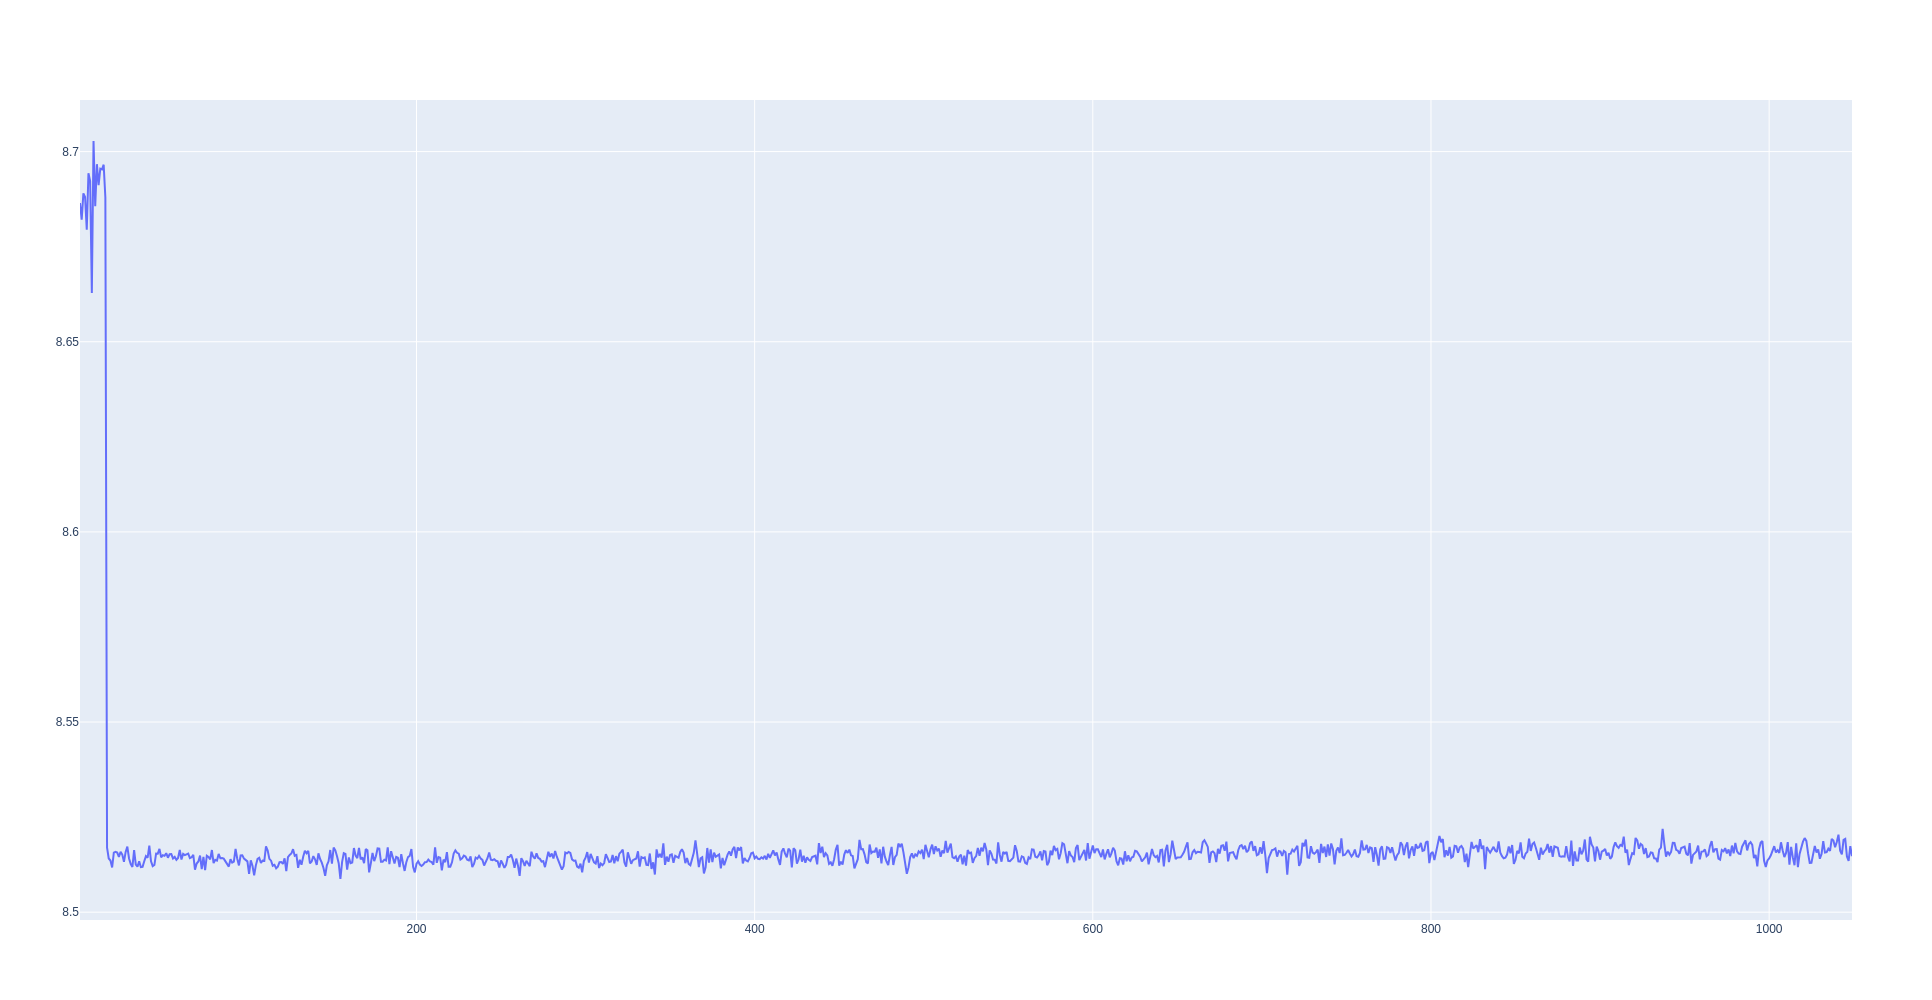

In [10]:
with open('./consuming_channnel_sweep.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    rows = list(spamreader)
    filters = [int(row[0]) for row in rows]
    filter_meas = [float(row[1]) for row in rows]
fig = go.Figure()
fig.add_trace(go.Scatter(x=filters, y=filter_meas, name="Filter Measurements"))

fig.update_layout(
    autosize=False,
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
    # margin=dict(
    #     l=50,
    #     r=50,
    #     b=100,
    #     t=100,
    #     pad=4
    # ),
)

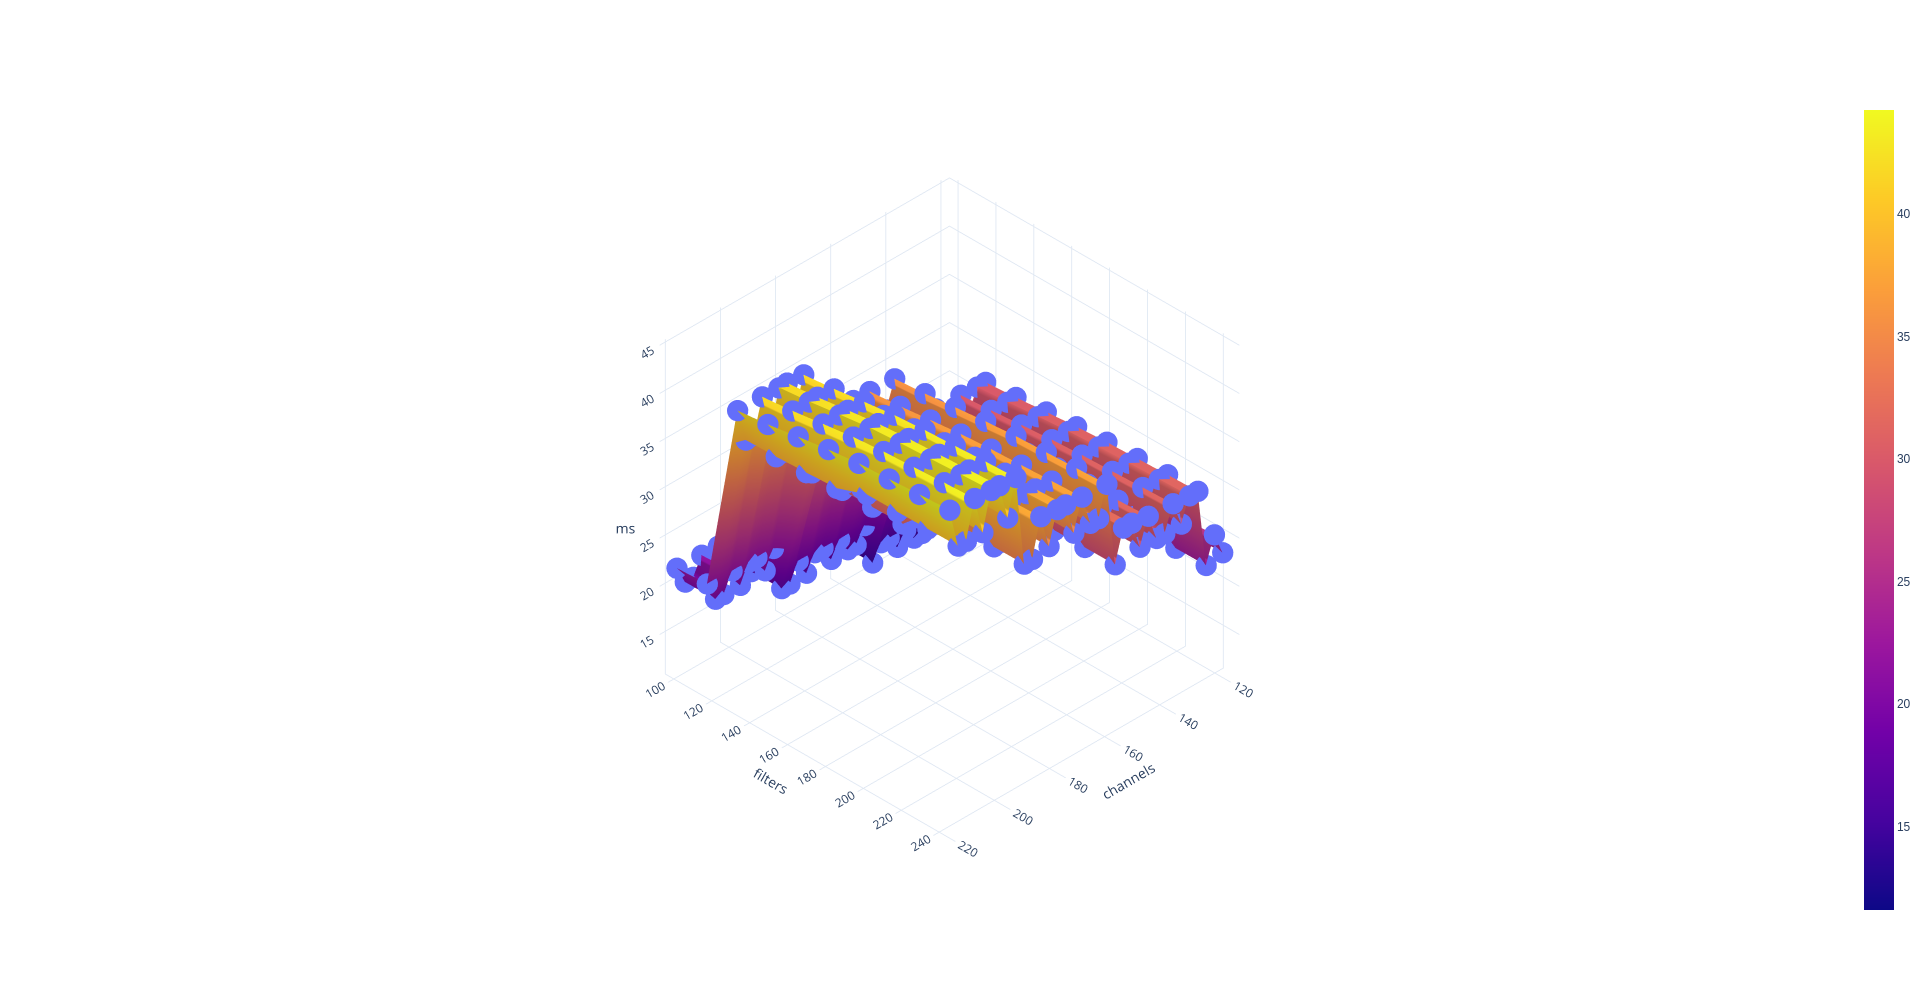

In [11]:


# Read data from a csv
df = pd.read_csv('./lut_channel_filter_sweep.csv', usecols=["channels", "filters", "ms"])
split_df = df.groupby('channels')
fig = go.Figure()
#
# for category, category_df in split_df:
#     fig.add_trace(go.Scatter(
#         # x=category_df['channels'],
#         x=category_df['filters'],
#         y=category_df['ms'],
#         # mode='markers',
#         marker=dict(size=7),
#         name=f"channel {category}",
#         mode='markers+lines',
#         line=dict(
#             dash='dash',
#             width=.5
#         )
#     ))
#
# # Customize the plot
# fig.update_layout(
#     scene=dict(
#         xaxis_title='channels',
#         yaxis_title='filters',
#         zaxis_title='ms'
#     ),
#     width=1600,
#     height=1200,
#         template='plotly_white',
# )
# fig.layout.scene.camera.projection.type = "orthographic"
# # Display the plot
# fig.show()
# fig = go.Figure()
# split_df = df.groupby('filters')
#
# for category, category_df in split_df:
#     fig.add_trace(go.Scatter(
#         # x=category_df['channels'],
#         x=category_df['channels'],
#         y=category_df['ms'],
#         # mode='markers',
#         marker=dict(size=7),
#         name=f"filter {category}",
#         mode='markers+lines',
#         line=dict(
#             dash='dash',
#             width=.5
#         )
#     ))
#
# # Customize the plot
# fig.update_layout(
#     scene=dict(
#         xaxis_title='channels',
#         yaxis_title='filters',
#         zaxis_title='ms'
#     ),
#     width=1600,
#     height=1200,
#         template='plotly_white',
# )
# fig.layout.scene.camera.projection.type = "orthographic"
# # Display the plot
# fig.show()
# fig = go.Figure()

# for category, category_df in split_df:
# df.sort_values()
# x=df['channels']
# y=df['filters']
# z=df['ms']

x_unique = list(set(df["channels"]))
x_unique.sort()
y_unique = list(set(df["filters"]))
y_unique.sort()
# print(y_unique)
z = []
for y in y_unique:
    z.append([])
    for x in x_unique:
        z[-1].append(df.loc[df["channels"] == x].loc[df["filters"] == y]["ms"].values[0])
# np.reshape([x.shape[0], y.shape[0]])
# print(z)
fig.add_trace(go.Scatter3d(
    x=df['channels'],
    y=df['filters'],
    z=df['ms'],
    mode='markers',
    marker=dict(size=7),
    # name=f"channel {category}",
    # mode='markers+lines',
    line=dict(
        dash='dash',
        width=.5
    )
))
fig.add_trace(go.Surface(
    x=x_unique,
    y=y_unique,
    z=z,
))
# Customize the plot
fig.update_layout(
    scene=dict(
        xaxis_title='channels',
        yaxis_title='filters',
        zaxis_title='ms'
    ),
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
        template='plotly_white',
)
fig.layout.scene.camera.projection.type = "orthographic"
# Display the plot
fig.show()


2.677596706448907e-14
0.3029217466764737
1.6277752352505537
1.4690517546764101
1.7215275256522529
2.048453928944934
0.17018368546144402
0.08004513341651787
0.25385626844253495
0.4111639078701732


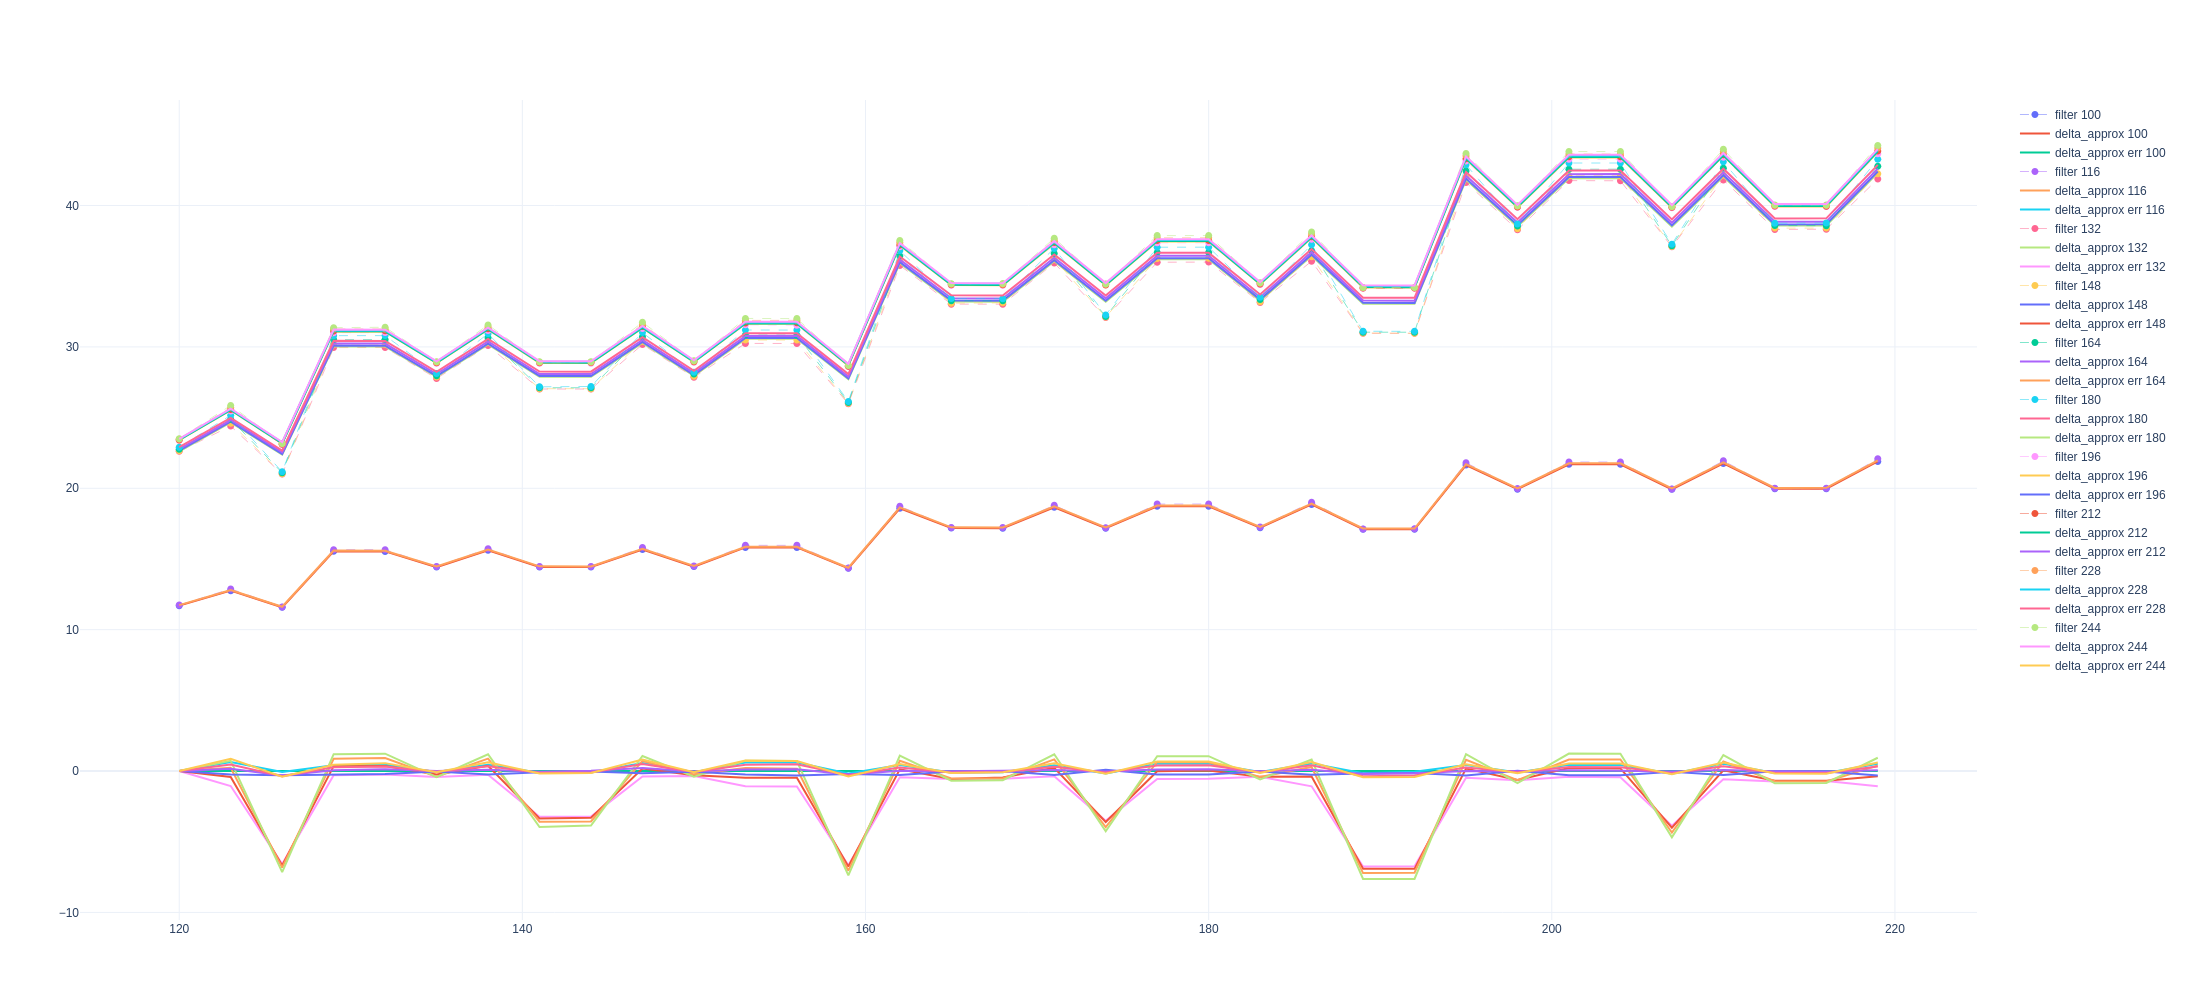

In [43]:
fig = go.Figure()
split_df = df.groupby('filters')
first = True
deltas = []
approx = split_df.get_group(100)
# print(approx)
lv = list(approx['ms'])[0]
for meas in list(approx['ms'])[1:]:
    deltas.append((meas / lv))
    lv = meas
# print(deltas)

for category, category_df in split_df:
    # print(category_df)
    # if not first:
    #    continue
    upper_right = 195
    upper_left = 129
    lower_right = 192
    lower_left = 126
    # upper_m, upper_b = lin_interpol( upper_sampled_channels[0], upper_sampled_channels[1], upper_sampled_channel_meas[0], upper_sampled_channel_meas[1])

    upper_right_meas = category_df.loc[category_df["channels"] == upper_right]["ms"].values[0]
    upper_left_meas = category_df.loc[category_df["channels"] == upper_left]["ms"].values[0]

    lower_right_meas = category_df.loc[category_df["channels"] == lower_right]["ms"].values[0]
    lower_left_meas = category_df.loc[category_df["channels"] == lower_left]["ms"].values[0]

    # print(upper_right_meas)
    # print(upper_left_meas)

    upper_m, upper_b = lin_interpol(upper_left - 3, upper_right - 3, upper_left_meas, upper_right_meas)
    lower_m, lower_b = lin_interpol(lower_left, lower_right, lower_left_meas, lower_right_meas)
    # print(list(category_df['channels']))
    # print(list(range(category_df['channels'][0], list(category_df['channels'])[-1])))
    start = list(category_df['channels'])[0]
    end = list(category_df['channels'])[-1]
    r_c = list(range(start, end))

    r_v_upper = [calc_upper(c, upper_m, upper_b) for c in r_c]
    r_v_lower = [calc_lower(c, lower_m, lower_b) for c in r_c]

    # fig.add_trace(go.Scatter(x=r_c, y=[c * upper_m + upper_b for c in r_c], name="Upper Sampled Channels"))
    # fig.add_trace(go.Scatter(x=r_c, y=[c * lower_m + lower_b for c in r_c], name="Lower Sampled Channels"))
    r_v_rect = [calc_rect(c, upper_m, upper_b, lower_m, lower_b) for c in r_c]
    lv = list(category_df['ms'])[0]
    delta_approx = [lv]
    for delta in deltas:
        lv = delta * lv
        delta_approx.append(lv)
        
    errs = [(1 - (g / m)) * 100 for g, m in zip(delta_approx, list(category_df['ms']))]
    print(np.mean(np.abs(errs)))
    fig.add_trace(go.Scatter(
        # x=category_df['channels'],
        x=category_df['channels'],
        y=category_df['ms'],
        # mode='markers',
        marker=dict(size=7),
        name=f"filter {category}",
        mode='markers+lines',
        line=dict(
            dash='dash',
            width=.5
        )
    ))
    fig.add_trace(go.Scatter(
        x=list(category_df['channels']),
        y=delta_approx,
        name=f"delta_approx {category}",
        mode='lines',
    ))
    
    fig.add_trace(go.Scatter(
        x=list(category_df['channels']),
        y=errs,
        name=f"delta_approx err {category}",
        mode='lines',
    ))
    #
    # fig.add_trace(go.Scatter(
    #     x=r_c,
    #     y=r_v_lower,
    #     name=f"Lower filter {category}",
    #     mode='lines',
    # ))
    # deltas = []
    # lv = list(category_df['ms'])[0]
    # for meas in list(category_df['ms'])[1:]:
    #     deltas.append((meas / lv) * 10 - 10 )
    #     lv = meas
    # fig.add_trace(go.Scatter(
    #     # x=category_df['channels'],
    #     x=list(category_df['channels'])[1:],
    #     y=deltas,
    #     name=f"filter {category} deltas",
    # ))
    # fig.add_trace(go.Scatter(
    #     # x=category_df['channels'],
    #     x=r_c,
    #     y=r_v_rect,
    #     # mode='markers',

    #     name=f"Approximation filter {category}",
    #     mode='lines',

    # ))


    first = False
fig.update_layout(
    scene=dict(
        xaxis_title='channels',
        yaxis_title='filters',
        zaxis_title='ms'
    ),
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
        template='plotly_white',
)
fig.show()

In [ ]:
fig = go.Figure()
split_df = df.groupby('channels')
first = True
for category, category_df in split_df:
    # if not first:
    # #    continue
    # upper_right = 195
    # upper_left = 129
    # lower_right = 192
    # lower_left = 126
    # # upper_m, upper_b = lin_interpol( upper_sampled_channels[0], upper_sampled_channels[1], upper_sampled_channel_meas[0], upper_sampled_channel_meas[1])

    # upper_right_meas = category_df.loc[category_df["channels"] == upper_right]["ms"].values[0]
    # upper_left_meas = category_df.loc[category_df["channels"] == upper_left]["ms"].values[0]

    # lower_right_meas = category_df.loc[category_df["channels"] == lower_right]["ms"].values[0]
    # lower_left_meas = category_df.loc[category_df["channels"] == lower_left]["ms"].values[0]

    # print(upper_right_meas)
    # print(upper_left_meas)

    # upper_m, upper_b = lin_interpol(upper_left - 3, upper_right - 3, upper_left_meas, upper_right_meas)
    # lower_m, lower_b = lin_interpol(lower_left, lower_right, lower_left_meas, lower_right_meas)
    # # print(list(category_df['channels']))
    # # print(list(range(category_df['channels'][0], list(category_df['channels'])[-1])))
    # start = list(category_df['channels'])[0]
    # end = list(category_df['channels'])[-1]
    # r_c = list(range(start, end))

    # r_v_upper = [calc_upper(c, upper_m, upper_b) for c in r_c]
    # r_v_lower = [calc_lower(c, lower_m, lower_b) for c in r_c]

    # # fig.add_trace(go.Scatter(x=r_c, y=[c * upper_m + upper_b for c in r_c], name="Upper Sampled Channels"))
    # # fig.add_trace(go.Scatter(x=r_c, y=[c * lower_m + lower_b for c in r_c], name="Lower Sampled Channels"))
    # r_v_rect = [calc_rect(c, upper_m, upper_b, lower_m, lower_b) for c in r_c]

    fig.add_trace(go.Scatter(
        # x=category_df['channels'],
        x=category_df['filters'],
        y=category_df['ms'],
        # mode='markers',
        marker=dict(size=7),
        name=f"filter {category}",
        mode='markers+lines',
        line=dict(
            dash='dash',
            width=.5
        )
    ))
    # fig.add_trace(go.Scatter(
    #     x=r_c,
    #     y=r_v_upper,
    #     name=f"Upper filter {category}",
    #     mode='lines',
    # ))
    #
    # fig.add_trace(go.Scatter(
    #     x=r_c,
    #     y=r_v_lower,
    #     name=f"Lower filter {category}",
    #     mode='lines',
    # ))
    # fig.add_trace(go.Scatter(
    #     # x=category_df['channels'],
    #     x=r_c,
    #     y=r_v_rect,
    #     # mode='markers',

    #     name=f"Approximation filter {category}",
    #     mode='lines',

    # ))


    first = False
fig.update_layout(
    scene=dict(
        xaxis_title='channels',
        yaxis_title='filters',
        zaxis_title='ms'
    ),
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
        template='plotly_white',
)
fig.show()

In [ ]:
filenames = ["lut_input_sweep_K1x1.csv", "lut_input_sweep_K3x3.csv", "lut_input_sweep_K5x5.csv"]
fig = go.Figure()

for fn in filenames:
    with open(fn) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        rows = list(spamreader)
        inputs = [int(row[0]) for row in rows]
        input_meas = [float(row[1]) for row in rows]
    fig.add_trace(go.Scatter(x=[input**2 for input in inputs], y=input_meas, name=f"Input Measurements{fn}"))
    
    fig.update_layout(
        autosize=False,
    width=PLOT_WIDTH,
    height=PLOT_HEIGHT,
        # margin=dict(
        #     l=50,
        #     r=50,
        #     b=100,
        #     t=100,
        #     pad=4
        # ),
    )
fig.show()